# Notebook for Ground Movement related to the Section

In [1]:
#import packages
import numpy as np
from matplotlib import pyplot as plt

In [18]:
'''
Functions:
- zg
- zgtilt
- zgcurv
'''

def math2_tilt(R,r):
    return -((2*np.pi*r)/R**2)*(np.exp(-np.pi*((r**2)/(R**2))))

def math2_curvature(R,r):
    return ((2*np.pi*np.exp(-np.pi*((r**2)/(R**2))))*(R**2 - 2*np.pi*r**2))/R**4

def num_tilt(z,ds):
    '''
    z: array (np or list) with the vertical displacements
    ds: spacing between points
    '''
    tilt = []
    
    for i in range(1,len(z)):
        tilt.append((z[i]-z[i-1])/ds)
    
    return np.array(tilt)

def centered_difference(z,ds):
    '''
    Numerical calculation of the curvature
    '''
    output = []
    
    for i in range(1,len(z)-1):
        
        cdiff = (z[i+1]-2*z[i]+z[i-1])/(ds**2)
        output.append(cdiff)
        
    return np.array(output)

def radialdistance(x,x0,y,y0):
    return np.sqrt(((x-x0)**2 + (y-y0)**2))

def zg(R,r):
    return -np.exp(-np.pi * (r**2/R**2))

def zgtilt(R,r):
#     return ((2*np.pi*r**2)/(R**3))*zg(R,r)
    return ((2*np.pi*r)/R**2) * (np.exp(-np.pi * (r**2/R**2)))

def zgcurv(R,r):
#     return ((2*np.pi*r**2 - 3*R**2)/(R**3))*zgtilt(R,r)
    return (((-4*np.pi**2 * r**2)/R**4) + ((2*np.pi)/R**2))*np.exp(-np.pi * (r**2/R**2))

def sign_adjustment(x,r):
    '''
    x: array that needs a sign change
    r: is the array which checks at what location the sign changes
    '''
    for i in range(len(r)):
        if r[i]>=0:
            x[i] = -x[i]
    return x

In [19]:
'''
parameters
- x (2D)
- y (2D)
- z (2D) -> zg
- z1 (1D)
- ztilt (2D)
- ztilt1 (1D)
- zcurv (2D)
- zcurv1 (1D)
'''

# center location
x_0 = 25 #meters
y_0 = 25 #meters 

# range
x_range = 20 # meters (around center)
y_range = 20 # meters (around center)

R = 7
nx=500   # number of samples within range

x = np.linspace(x_0-x_range/2, x_0+x_range/2, nx)
y = np.linspace(y_0-y_range/2,y_0+y_range/2, nx)
xv, yv = np.meshgrid(x, y);

v = 0.0030 #m/day
t = 12*3 #range(0,120,12) #days, after roughly a month

r_2D = radialdistance(xv,x_0,yv,y_0)
r_1D = radialdistance(x,x_0,y,y_0)

z = zg(R,r_2D)
z1 = zg(R,r_1D)

ztilt = zgtilt(R,r_2D)
ds = abs(x[1]-x[0])
# ztilt_num = num_tilt(z,ds)
ztilt1 = zgtilt(R,r_1D)
# ztilt_num1 = num_tilt(z1,ds)
# ztilt_math2 = math2_tilt(R,r_1D)

zcurv = zgcurv(R,r_2D)
zcurv1 = zgcurv(R,r_1D)
# zcurv_num = centered_difference(z,ds)
# zcurv_num1 = centered_difference(z1,ds)
# zcurv1_math2 = math2_curvature(R,r_1D)

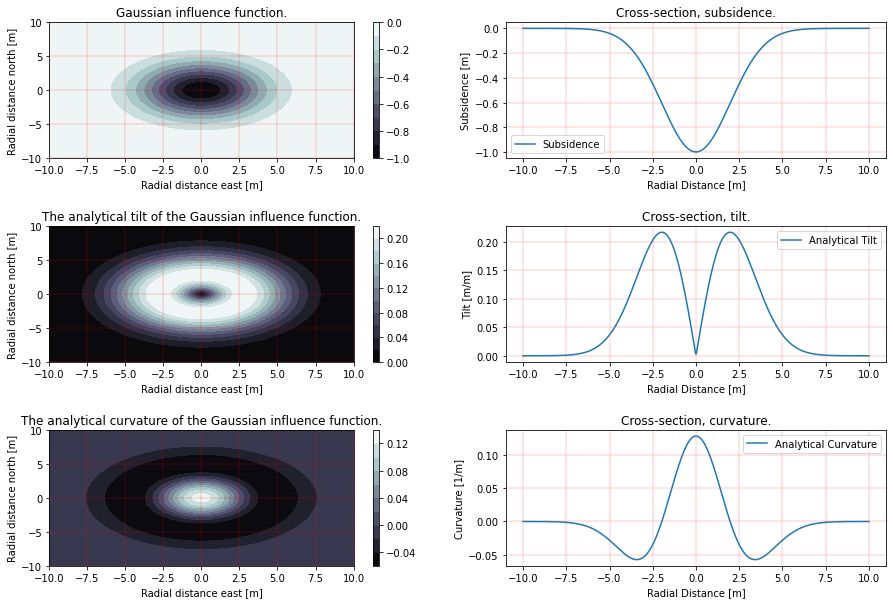

In [24]:
# Plotting the results
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
fig.subplots_adjust(hspace=0.5)
# fig.suptitle('Spatial subsidence simulations using the kinematic model.')

# executing the function
# z=zg(xv,x_0,yv,y_0,R,S)

# Plot the data
h  = axs[0,0].contourf(x-x_0,y-y_0,z, 10,cmap=plt.cm.bone, origin='lower')
axs[0,0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[0,0])

axs[0,0].set_title('Gaussian influence function.')
# axs[0,0].set_xlabel('Distance east [m]')
# axs[0,0].set_ylabel('Distance north [m]')
axs[0,0].set_xlabel('Radial distance east [m]')
axs[0,0].set_ylabel('Radial distance north [m]')

# Cross-section at y=0
# z1 = zg(x,x_0,0,0,R,S)

# axs[0,1].plot(x, z1, label='Subsidence')
axs[0,1].plot(x-x_0, z1, label='Subsidence')
# Add a legend
axs[0,1].legend()
axs[0,1].grid(color='r', linestyle='-', linewidth=0.2)
axs[0,1].set_title('Cross-section, subsidence.')
axs[0,1].set_xlabel('Radial Distance [m]')
axs[0,1].set_ylabel('Subsidence [m]');

'''Define the tilt'''
# executing the function
# z=zgtilt(xv,x_0,yv,y_0,R,S)

# Plot the data
h  = axs[1,0].contourf(x-x_0,y-y_0,ztilt, 10,cmap=plt.cm.bone, origin='lower')
axs[1,0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[1,0])

axs[1,0].set_title('The analytical tilt of the Gaussian influence function.')
# axs[1,0].set_xlabel('Distance east [m]')
# axs[1,0].set_ylabel('Distance north [m]')
axs[1,0].set_xlabel('Radial distance east [m]')
axs[1,0].set_ylabel('Radial distance north [m]')

# Cross-section at y=0
# z1 = zgtilt(x,x_0,0,0,R,S)

# axs[1,1].plot(x, ztilt1, label='Tilt')

#change the sign halfway
# ztilt1_adj = np.array(list(map(sign_adjustment,ztilt1)))

# ztilt1_adj = sign_adjustment(ztilt1,x-x_0)
# ztilt_test_adj = sign_adjustment(ztilt_math2,x-x_0)

# axs[1,1].plot(x, ztilt1_adj, label='Mathematical Tilt')
# axs[1,1].plot(x[1:],ztilt_num1,label='Numerical Tilt')
axs[1,1].plot(x-x_0,ztilt1,label='Analytical Tilt')

# Add a legend
axs[1,1].legend()
axs[1,1].grid(color='r', linestyle='-', linewidth=0.2)
axs[1,1].set_title('Cross-section, tilt.')
axs[1,1].set_xlabel('Radial Distance [m]')
axs[1,1].set_ylabel('Tilt [m/m]'); 

'''Define the curvature

Should the curve have a convex/concave shape just like in the figure on top?

'''

# executing the function
# z=zgcurv(xv,x_0,yv,y_0,R,S)

# Plot the data
h  = axs[2,0].contourf(x-x_0,y-y_0,zcurv, 10,cmap=plt.cm.bone, origin='lower')
axs[2,0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[2,0])

axs[2,0].set_title('The analytical curvature of the Gaussian influence function.')
axs[2,0].set_xlabel('Radial distance east [m]')
axs[2,0].set_ylabel('Radial distance north [m]')

# Cross-section at y=0
# z1 = zgcurv(x,x_0,0,0,R,S)


# zcurv1_adj = sign_adjustment(zcurv1,x-x_0)
# zcurv1_math2_adj = sign_adjustment(zcurv1_math2,x-x_0)

# axs[2,1].plot(x, zcurv1, label='Curvature')
# axs[2,1].plot(x, zcurv1_adj, label='Mathematical Curvature')
# axs[2,1].plot(x[2:],zcurv_num1,label='Numerical Curvature')

# axs[2,1].plot(x, zcurv1_math2_adj, label='Test')
axs[2,1].plot(x-x_0, zcurv1, label='Analytical Curvature')



# Add a legend
axs[2,1].legend()
axs[2,1].grid(color='r', linestyle='-', linewidth=0.2)
axs[2,1].set_title('Cross-section, curvature.')
axs[2,1].set_xlabel('Radial Distance [m]')
axs[2,1].set_ylabel('Curvature [1/m]'); 

In [26]:
fig.savefig('Subsidence_Figure2.png')

# Horizontal Displacement

Using the focal point method, we calculate the horizontal displacement.

To make this problem a little simpler, a few extra steps are proposed:
- Create horizontal movement figure set using radial coordinate system -> Not possible for linear change
- Create horizontal movement figure set using E-W coordinate system
- Implement LOS disturbance for the E-W coordinate system

In [27]:
def zg(R,r):
    return -np.exp(-np.pi * (r**2/R**2))

def hdisp(z,x,x0,y,y0,H):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    return (r/H)*z

def linear_change(hdisp):
    return hdisp[:,1:] - hdisp[:,:-1]

def strain_calculation(linear_change,ds):
    return linear_change/ds

def halfway_sign_change(x,hdisplacement):
    row, column = hdisplacement.shape

    hdisp_out = np.zeros((row,column))
    for i in range(column):
        if x[i] >= 0:
            hdisp_out[:,i] = -hdisplacement[:,i]
        else:
            hdisp_out[:,i] = hdisplacement[:,i]
    
    return hdisp_out

In [28]:
# center location
x_0 = 25 #meters
y_0 = 25 #meters 

# range
x_range = 20 # meters (around center)
y_range = 20 # meters (around center)

R = 7
nx= 1000   # number of samples within range
H = 10

x = np.linspace(x_0-x_range/2, x_0+x_range/2, nx)
y = np.linspace(y_0-y_range/2,y_0+y_range/2, nx)
xv, yv = np.meshgrid(x, y);

#define subsidence
r = np.sqrt((xv-x_0)**2 + (yv-y_0)**2)
z = -zg(R,r)
z1 = -zg(R,np.sqrt((x-x_0)**2 + (0-0)**2))

#calculate the parameters needed
disp_horizontal_2D = hdisp(z,xv,x_0,yv,y_0,H)
disp_horizontal_1D = hdisp(z1,x,x_0,0,0,H)

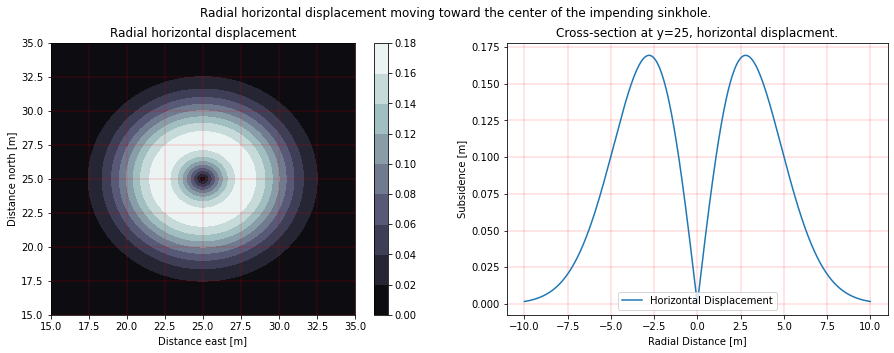

In [29]:
# Plotting the results
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Radial horizontal displacement moving toward the center of the impending sinkhole.')

# Plot the data
h  = axs[0].contourf(x,y,disp_horizontal_2D, 10,cmap=plt.cm.bone, origin='lower')
axs[0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[0])

axs[0].set_title('Radial horizontal displacement')
axs[0].set_xlabel('Distance east [m]')
axs[0].set_ylabel('Distance north [m]')

# axs[0,1].plot(x, z1, label='Subsidence')
axs[1].plot(x-x_0, disp_horizontal_1D, label='Horizontal Displacement')
# Add a legend
axs[1].legend()
axs[1].grid(color='r', linestyle='-', linewidth=0.2)
axs[1].set_title('Cross-section at y=25, horizontal displacment.')
axs[1].set_xlabel('Radial Distance [m]')
axs[1].set_ylabel('Subsidence [m]');

In [30]:
disp_horizontal_2D_EW = hdisp(z,xv,x_0,0,0,H)
disp_horizontal_1D_EW = hdisp(z1,x,x_0,0,0,H)

#transform disp_horizontal_2D_EW such that a sign switch appears in the middle
disp_horizontal_2D_EW2 = halfway_sign_change(x-x_0,disp_horizontal_2D_EW)
disp_horizontal_1D_EW2 = halfway_sign_change(x-x_0,disp_horizontal_1D_EW.reshape((1,nx)))

#linear change
linear_change_2D_EW = linear_change(disp_horizontal_2D_EW2)
linear_change_1D_EW = linear_change(disp_horizontal_1D_EW2)

#strains
ds = np.abs(x[1]-x[0])
extcomp_2D_EW = strain_calculation(linear_change_2D_EW,ds)
extcomp_1D_EW = strain_calculation(linear_change_1D_EW,ds)

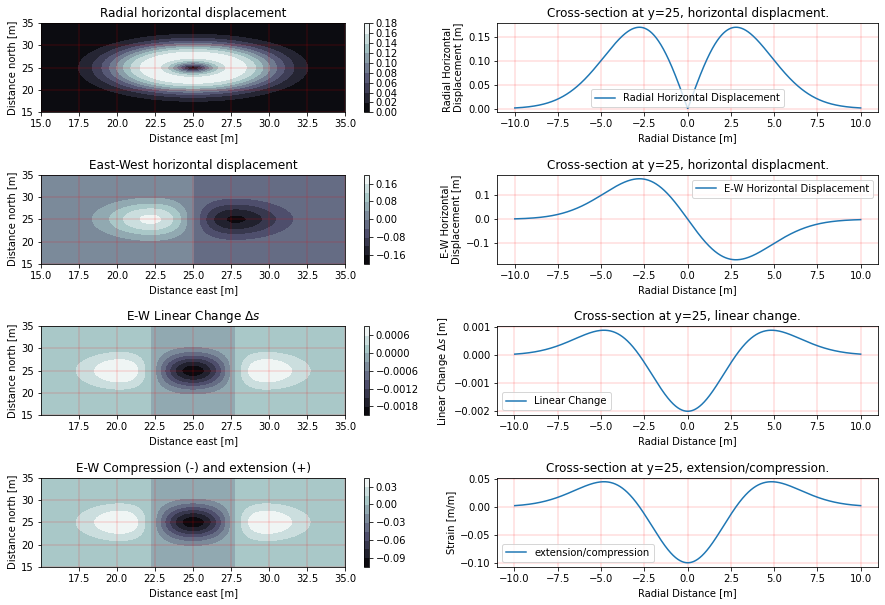

In [32]:
# Plotting the results
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(15,10))
fig.subplots_adjust(hspace=0.7)
# fig.suptitle('East-West horizontal displacement moving toward the center of the impending sinkhole.')

# Plot the data
h  = axs[0,0].contourf(x,y,hdisp(z,xv,x_0,yv,y_0,H), 10,cmap=plt.cm.bone, origin='lower')
axs[0,0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[0,0])

axs[0,0].set_title('Radial horizontal displacement')
axs[0,0].set_xlabel('Distance east [m]')
axs[0,0].set_ylabel('Distance north [m]')

# axs[0,1].plot(x, z1, label='Subsidence')
axs[0,1].plot(x-x_0, disp_horizontal_1D_EW, label='Radial Horizontal Displacement')
# Add a legend
axs[0,1].legend()
axs[0,1].grid(color='r', linestyle='-', linewidth=0.2)
axs[0,1].set_title('Cross-section at y=25, horizontal displacment.')
axs[0,1].set_xlabel('Radial Distance [m]')
axs[0,1].set_ylabel('Radial Horizontal \nDisplacement [m]');

'''sign flip implemented'''
# Plot the data
h  = axs[1,0].contourf(x,y,disp_horizontal_2D_EW2, 10,cmap=plt.cm.bone, origin='lower')
axs[1,0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[1,0])

axs[1,0].set_title('East-West horizontal displacement')
axs[1,0].set_xlabel('Distance east [m]')
axs[1,0].set_ylabel('Distance north [m]')

# axs[0,1].plot(x, z1, label='Subsidence')
axs[1,1].plot(x-x_0, disp_horizontal_1D_EW2.T, label='E-W Horizontal Displacement')
# Add a legend
axs[1,1].legend()
axs[1,1].grid(color='r', linestyle='-', linewidth=0.2)
axs[1,1].set_title('Cross-section at y=25, horizontal displacment.')
axs[1,1].set_xlabel('Radial Distance [m]')
axs[1,1].set_ylabel('E-W Horizontal \nDisplacement [m]');

'''Define the linear change'''

# Plot the data
h  = axs[2,0].contourf(x[1:],y,linear_change_2D_EW, 10,cmap=plt.cm.bone, origin='lower')
axs[2,0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[2,0])

axs[2,0].set_title('E-W Linear Change $\Delta s$')
axs[2,0].set_xlabel('Distance east [m]')
axs[2,0].set_ylabel('Distance north [m]')


axs[2,1].plot(x[1:]-x_0, linear_change_1D_EW.T, label='Linear Change')

# Add a legend
axs[2,1].legend()
axs[2,1].grid(color='r', linestyle='-', linewidth=0.2)
axs[2,1].set_title('Cross-section at y=25, linear change.')
axs[2,1].set_xlabel('Radial Distance [m]')
axs[2,1].set_ylabel('Linear Change $\Delta s$ [m]'); 

'''
extension and compression
'''
# Plot the data
h  = axs[3,0].contourf(x[1:],y,extcomp_2D_EW, 10,cmap=plt.cm.bone, origin='lower')
axs[3,0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[3,0])

axs[3,0].set_title('E-W Compression (-) and extension (+)')
axs[3,0].set_xlabel('Distance east [m]')
axs[3,0].set_ylabel('Distance north [m]')

# axs[2,1].plot(x, zcurv1, label='Curvature')
axs[3,1].plot(x[1:]-x_0, extcomp_1D_EW.T, label='extension/compression')

# Add a legend
axs[3,1].legend()
axs[3,1].grid(color='r', linestyle='-', linewidth=0.2)
axs[3,1].set_title('Cross-section at y=25, extension/compression.')
axs[3,1].set_xlabel('Radial Distance [m]')
axs[3,1].set_ylabel('Strain [m/m]'); # Plotting the results

In [33]:
fig.savefig('Horizontal_Displacement_Figures.png')

# Create Strain figure with magnitude vector of hdisp and subsidence
Same as for the mogi model

In [ ]:
de = disp_horizontal_1D
du = z1

defor_vector = np.sqrt(de**2 + du**2)

strain = defor_vector[1:] - defor_vector[:-1]

plt.figure(figsize=(15,10))
plt.plot(x[1:]-x_0,np.abs(strain),label='Strain')
plt.ylabel('Radial Strain [m]')
plt.xlabel('Radial Distance [m]')

plt.grid(True)
plt.legend();

# Implement Line of Sight into the measurements
The line of sight is the direction the satellite is looking and therefore measuring. To the effect to look under a specific angle can be quite significant. Therefore, these next notebook block will show the effect of the line of sight has on the different ground movement components.

The conversion is based on a formula from the paper of Chang and Ramon.

$$d_{geo} = [d_e,d_n,d_u]$$

$$p = [-sin(\theta)cos(\alpha_h),sin(\theta)sin(\alpha_h),cos(\theta)]^T$$

$$d_{LOS}=p^Td_{geo}$$

The local incidence angle is denoted by $\theta$ and $\alpha_h$ is the instantaneous heading (azimuth with respect to the North) of the satellite track.

## Roadmap
- Implement LOS algorithm
- Find/assume satellite parameters
- Apply LOS to both the subsidence figures and the horizontal displacement figures (creating 5 sets of figures)
    - LOS Applied to the subsidence case
    - LOS Difference map of actual and los subsidence
    - LOS with no north-south component -> $dn = [0 \cdots 0]^T$
    - Implement double transform -> Subsidence to LOS, LOS to subsidence (hopefully there is a shift in location)

In [ ]:
#clear all the variables and functions
import sys
sys.exit(0)
sys.modules[__name__].__dict__.clear()



In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

#Redefine parameters
R = 7
H = 10

# center location
x_0 = 25 #meters
y_0 = 25 #meters 

# range
x_range = 20 # meters (around center)
y_range = 20 # meters (around center)

R = 7
nx   = 1000   # number of samples within range

x = np.linspace(x_0-x_range/2, x_0+x_range/2, nx)
y = np.linspace(y_0-y_range/2,y_0+y_range/2, nx)
xv, yv = np.meshgrid(x, y);

los_angle = 45 #degrees
heading = 190 #degrees, dsc

In [ ]:
def zg(x,x0,y,y0,R):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    return -np.exp(-np.pi * (r**2/R**2))

#redefine the los measurement
def xhdisp(x,x0,y,y0,R,H):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    
    return ((x-x0)/H)*zg(x,x0,y,y0,R)

def yhdisp(x,x0,y,y0,R,H):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    
    return ((y-y0)/H)*zg(x,x0,y,y0,R)

#defining the deformation vector dgeo
def LOS(x,x0,y,y0,R,H,los_angle,heading):    
    de = xhdisp(x,x0,y,y0,R,H)
    dn = yhdisp(x,x0,y,y0,R,H)
    du = zg(x,x0,y,y0,R)    
    dgeo = np.array([de,dn,du])
    
    #incidence angle
    theta = np.deg2rad(los_angle)
    alpha = np.deg2rad(heading)
    
    #projection vector
    p = np.array([-np.sin(theta)*np.cos(alpha),np.sin(theta)*np.sin(alpha),np.cos(theta)])
    
    nx, ny = x.shape
    output = np.zeros((ny,nx))

    for i in range(ny):
        for j in range(nx):
            output[j,i] = p.T @ dgeo[:,j,i]
    return output

#defining the deformation vector dgeo
def LOS2(x,x0,y,y0,R,H,los_angle,heading):     
    de = xhdisp(x,x0,y,y0,R,H)
    dn = yhdisp(x,x0,y,y0,R,H)
    du = zg(x,x0,y,y0,R) 
    dgeo = np.array([de,dn,du])
    
    #incidence angle
    theta = np.deg2rad(los_angle)
    alpha = np.deg2rad(heading)
    
    #projection vector
    p = np.array([-np.sin(theta)*np.cos(alpha),np.sin(theta)*np.sin(alpha),np.cos(theta)])

    return p.T @ dgeo

In [ ]:
'''
calculate the nessecary parameters:
z (2D)
z1 (1D)
ztilt (2D)
ztilt1 (1D)
ztilt1_adj = sign_adjustment(ztilt1,x-x_0)
zcurv (2D)
zcurv1 (1D)
'''
rv = np.sqrt((x-x_0)**2 + (y-y_0)**2)

# z = zg(R,rv)
z_los = LOS(xv,x_0,yv,y_0,R,H,los_angle,heading)

z1 = z_los[int(nx/2),:]

# z_sub = zg(R,x,x_0,y,y_0)
# z_sub1 = zg(R,)

In [ ]:
# Plotting the results
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Spatial subsidence simulations using the kinematic model.')

# Plot the data
h  = axs[0].contourf(x,y,z_los, 10,cmap=plt.cm.bone, origin='lower')
axs[0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[0])

axs[0].set_title('Gaussian influence function')
axs[0].set_xlabel('Distance east [m]')
axs[0].set_ylabel('Distance north [m]')

axs[1].plot(x-x_0, z1, label='Subsidence')
# Add a legend
axs[1].legend()
axs[1].grid(color='r', linestyle='-', linewidth=0.2)
axs[1].set_title('Cross-section at y=25, subsidence.')
axs[1].set_xlabel('Radial Distance [m]')
axs[1].set_ylabel('Subsidence [m]');

In [ ]:
'''
Here, we take the difference between the subsidence and the LOS measurements. 
The assumption we made here is that the LOS is the same as the subsidence.

I don't think this is correct and you're not allowed to do this
'''
z_los = LOS(xv,x_0,yv,y_0,R,H,los_angle,heading)
z1 = z_los[int(nx/2),:]

z_sub = zg(xv,x_0,yv,y_0,R)
z_diff = np.abs(z_sub - z_los)
z1_diff = np.abs(z_sub[int(nx/2),:]-z_los[int(nx/2),:])

# Plotting the results
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Spatial subsidence simulations using the kinematic model.')

# Plot the data
h  = axs[0].contourf(x,y,z_diff, 10,cmap=plt.cm.bone, origin='lower')
axs[0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[0])

axs[0].set_title('Gaussian influence function')
axs[0].set_xlabel('Distance east [m]')
axs[0].set_ylabel('Distance north [m]')

axs[1].plot(x-x_0, z1_diff, label='Subsidence')
# Add a legend
axs[1].legend()
axs[1].grid(color='r', linestyle='-', linewidth=0.2)
axs[1].set_title('Cross-section at y=25, subsidence.')
axs[1].set_xlabel('Radial Distance [m]')
axs[1].set_ylabel('Subsidence [m]');

In [ ]:
# LOS with no north-south component ->  𝑑𝑛=[0⋯0]𝑇
#defining the deformation vector dgeo
def LOS2(x,x0,y,y0,R,H,los_angle,heading):    
    de = xhdisp(x,x0,y,y0,R,H)
    dn = 100*np.ones((x.shape))
    du = zg(x,x0,y,y0,R)    
    dgeo = np.array([de,dn,du])
    
    #incidence angle
    theta = np.deg2rad(los_angle)
    alpha = np.deg2rad(heading)
    
    #projection vector
    p = np.array([-np.sin(theta)*np.cos(alpha),np.sin(theta)*np.sin(alpha),np.cos(theta)])
    
    nx, ny = x.shape
    output = np.zeros((ny,nx))

    for i in range(ny):
        for j in range(nx):
            output[j,i] = p.T @ dgeo[:,j,i]
    return output

In [ ]:
z_los_zero = LOS2(xv,x_0,yv,y_0,R,H,los_angle,heading)
z1_zero = z_los_zero[int(nx/2),:]

# Plotting the results
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Spatial subsidence simulations using the kinematic model.')

# Plot the data
h  = axs[0].contourf(x,y,z_los_zero, 10,cmap=plt.cm.bone, origin='lower')
axs[0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[0])

axs[0].set_title('Gaussian influence function')
axs[0].set_xlabel('Distance east [m]')
axs[0].set_ylabel('Distance north [m]')

axs[1].plot(x-x_0, z1_zero, label='Subsidence')
# Add a legend
axs[1].legend()
axs[1].grid(color='r', linestyle='-', linewidth=0.2)
axs[1].set_title('Cross-section at y=25, subsidence.')
axs[1].set_xlabel('Radial Distance [m]')
axs[1].set_ylabel('Subsidence [m]');

In [ ]:
# Implement double transform -> Subsidence to LOS, LOS to subsidence (hopefully there is a shift in location)
# Restart the whole process

#clear all the variables and functions
import sys
sys.modules[__name__].__dict__.clear()

import numpy as np
import matplotlib.pyplot as plt

#Redefine parameters
R = 7
H = 10

# center location
x_0 = 25 #meters
y_0 = 25 #meters 

# range
x_range = 20 # meters (around center)
y_range = 20 # meters (around center)

R = 7
nx= 1000   # number of samples within range

x = np.linspace(x_0-x_range/2,x_0+x_range/2, nx)
y = np.linspace(y_0-y_range/2,y_0+y_range/2, nx)
xv, yv = np.meshgrid(x, y);

los_angle = 45 #degrees
heading = 190 #degrees, dsc

In [ ]:
def zg(x,x0,y,y0,R):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    return -np.exp(-np.pi * (r**2/R**2))

#redefine the los measurement
def xhdisp(x,x0,y,y0,R,H):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    
    return ((x-x0)/H)*zg(x,x0,y,y0,R)

def yhdisp(x,x0,y,y0,R,H):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    
    return ((y-y0)/H)*zg(x,x0,y,y0,R)

#defining the deformation vector dgeo
def LOS(x,x0,y,y0,R,H,los_angle,heading):    
    de = xhdisp(x,x0,y,y0,R,H)
    dn = yhdisp(x,x0,y,y0,R,H)
    du = zg(x,x0,y,y0,R)    
    dgeo = np.array([de,dn,du])
    
    #incidence angle
    theta = np.deg2rad(los_angle)
    alpha = np.deg2rad(heading)
    
    #projection vector
    p = np.array([-np.sin(theta)*np.cos(alpha),np.sin(theta)*np.sin(alpha),np.cos(theta)])
    
    nx, ny = x.shape
    output = np.zeros((ny,nx))

    for i in range(ny):
        for j in range(nx):
            output[j,i] = p.T @ dgeo[:,j,i]
    return output

def inverse_los(dlos,los_angle, heading):
    '''
    Notes
    '''
    #incidence angle
    theta = np.deg2rad(los_angle)
    alpha = np.deg2rad(heading)
    
    row, column = dlos.shape
    
    p = np.array([-np.sin(theta)*np.cos(alpha),np.sin(theta)*np.sin(alpha),np.cos(theta)]).reshape(1,3)

    dgeo = np.zeros((row,column,3))
    step1 = np.linalg.inv(p.T @ p)
    step2 = step1 @ p.T
    
    for i in range(row):
        for j in range(column):
            dgeo[i,j,:] = step2 @ np.array([dlos[i,j]])
    
#     dgeo = np.linalg.inv(p.T @ p) @ p.T @ dlos
    
    return dgeo

In [ ]:
#define subsidence 
z = zg(xv,x_0,yv,y_0,R)

dlos = LOS(xv,x_0,yv,y_0,R,H,los_angle,heading)

dgeo = inverse_los(dlos,los_angle,heading)

# plot dgeo in 3 contour plots (de,dn,du)


In [ ]:
# Plotting the results
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(25,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Check on the amount of information loss from the LOS direction to subsidence.')

# Plot the data
h  = axs[0].contourf(x,y,dgeo[:,:,2], 10,cmap=plt.cm.bone, origin='lower')
axs[0].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[0])

axs[0].set_title('Dlos to Subsidence')
axs[0].set_xlabel('Distance east [m]')
axs[0].set_ylabel('Distance north [m]');

# Plot the data
h  = axs[1].contourf(x,y,z, 10,cmap=plt.cm.bone, origin='lower')
axs[1].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[1])

axs[1].set_title('Gaussian influence function')
axs[1].set_xlabel('Distance east [m]')
axs[1].set_ylabel('Distance north [m]');

# Plot the data
h  = axs[2].contourf(x,y,z-dgeo[:,:,2], 10,cmap=plt.cm.bone, origin='lower')
axs[2].grid(color='r', linestyle='-', linewidth=0.2)
fig.colorbar(h, ax=axs[2])

axs[2].set_title('Difference')
axs[2].set_xlabel('Distance east [m]')
axs[2].set_ylabel('Distance north [m]');

#something that shows the shift in center of the sinkhole